Output Produksi: 3000.0


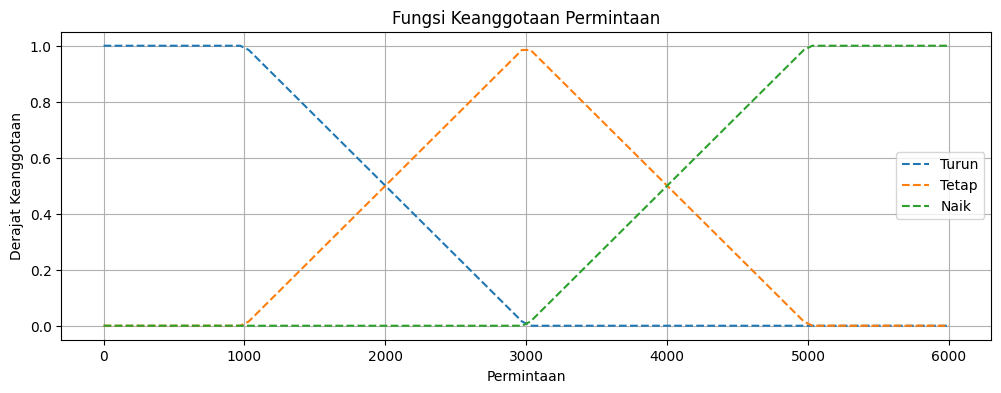

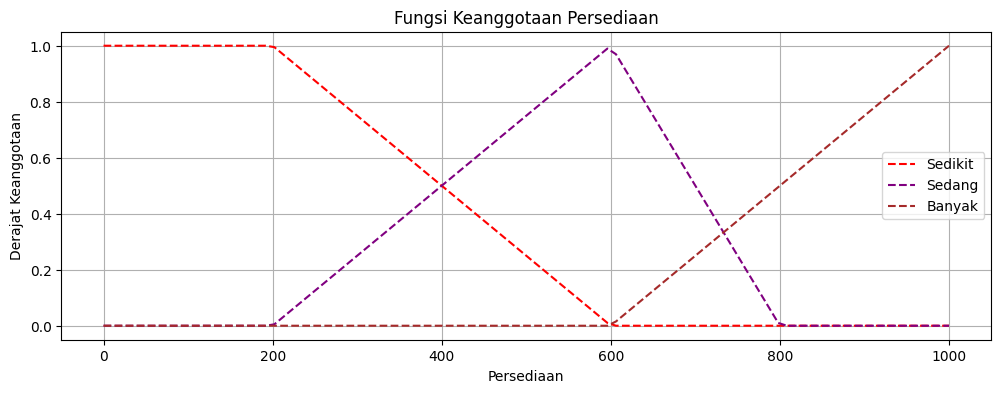

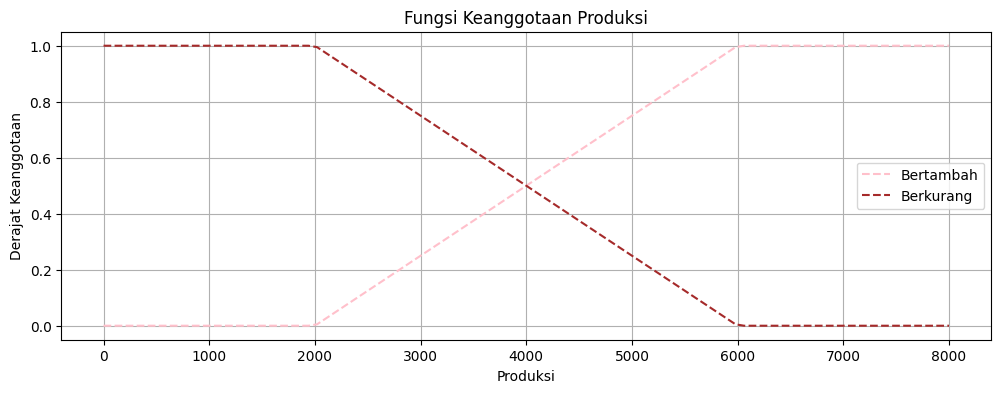

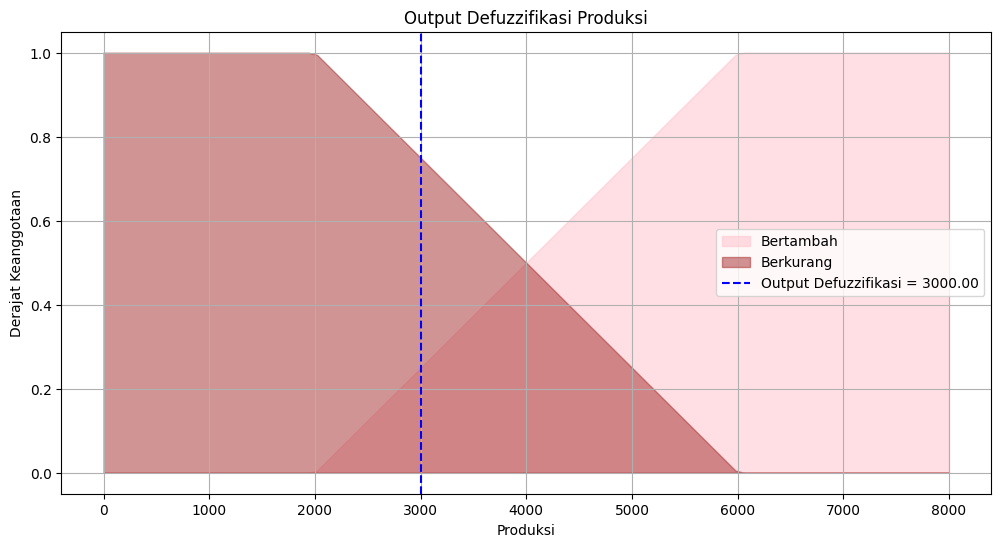

In [1]:
import numpy as np

# Fungsi Keanggotaan untuk Permintaan
def permintaan_turun(x):
    return np.maximum(0, np.minimum(1, (3000 - x) / 2000))

def permintaan_tetap(x):
    return np.maximum(0, np.minimum((x - 1000) / 2000, (5000 - x) / 2000))

def permintaan_naik(x):
    return np.maximum(0, np.minimum(1, (x - 3000) / 2000))

# Fungsi Keanggotaan untuk Persediaan
def persediaan_sedikit(x):
    return np.maximum(0, np.minimum(1, (600 - x) / 400))

def persediaan_sedang(x):
    return np.maximum(0, np.minimum((x - 200) / 400, (800 - x) / 200))

def persediaan_banyak(x):
    return np.maximum(0, np.minimum(1, (x - 600) / 400))

# Fungsi Keanggotaan untuk Produksi
def produksi_bertambah(z):
    return np.maximum(0, np.minimum(1, (z - 2000) / 4000))

def produksi_berkurang(z):
    return np.maximum(0, np.minimum(1, (6000 - z) / 4000))

# Inference (Rule-Based System)
def inference(permintaan, persediaan):
    # Rule Implementation
    rules = []

    # Jika Permintaan Turun dan Persediaan Sedikit maka Produksi Bertambah
    μ1 = min(permintaan_turun(permintaan), persediaan_sedikit(persediaan))
    z1 = 2000 + μ1 * 4000  # Fungsi invers dari produksi_bertambah
    rules.append((μ1, z1))
    
    # Jika Permintaan Turun dan Persediaan Sedang maka Produksi Berkurang
    μ2 = min(permintaan_turun(permintaan), persediaan_sedang(persediaan))
    z2 = 6000 - μ2 * 4000  # Fungsi invers dari produksi_berkurang
    rules.append((μ2, z2))
    
    # Jika Permintaan Turun dan Persediaan Banyak maka Produksi Berkurang
    μ3 = min(permintaan_turun(permintaan), persediaan_banyak(persediaan))
    z3 = 6000 - μ3 * 4000
    rules.append((μ3, z3))
    
    # Jika Permintaan Tetap dan Persediaan Sedikit maka Produksi Bertambah
    μ4 = min(permintaan_tetap(permintaan), persediaan_sedikit(persediaan))
    z4 = 2000 + μ4 * 4000
    rules.append((μ4, z4))
    
    # Jika Permintaan Tetap dan Persediaan Sedang maka Produksi Berkurang
    μ5 = min(permintaan_tetap(permintaan), persediaan_sedang(persediaan))
    z5 = 6000 - μ5 * 4000
    rules.append((μ5, z5))
    
    # Jika Permintaan Tetap dan Persediaan Banyak maka Produksi Berkurang
    μ6 = min(permintaan_tetap(permintaan), persediaan_banyak(persediaan))
    z6 = 6000 - μ6 * 4000
    rules.append((μ6, z6))
    
    # Jika Permintaan Naik dan Persediaan Sedikit maka Produksi Bertambah
    μ7 = min(permintaan_naik(permintaan), persediaan_sedikit(persediaan))
    z7 = 2000 + μ7 * 4000
    rules.append((μ7, z7))
    
    # Jika Permintaan Naik dan Persediaan Sedang maka Produksi Bertambah
    μ8 = min(permintaan_naik(permintaan), persediaan_sedang(persediaan))
    z8 = 2000 + μ8 * 4000
    rules.append((μ8, z8))
    
    # Jika Permintaan Naik dan Persediaan Banyak maka Produksi Berkurang
    μ9 = min(permintaan_naik(permintaan), persediaan_banyak(persediaan))
    z9 = 6000 - μ9 * 4000
    rules.append((μ9, z9))

    return rules

# Defuzzification (Perhitungan Output Final)
def defuzzification(rules):
    # Menggunakan rata-rata berbobot
    numerator = sum(μ * z for μ, z in rules)
    denominator = sum(μ for μ, z in rules)
    return numerator / denominator if denominator != 0 else 0

# Contoh Input
permintaan_input = 3500
persediaan_input = 500

# Hitung Output
rules = inference(permintaan_input, persediaan_input)
output = defuzzification(rules)

print("Output Produksi:", output)

import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menggambar fungsi keanggotaan
def plot_membership():
    x_permintaan = np.linspace(0, 6000, 100)
    x_persediaan = np.linspace(0, 1000, 100)
    x_produksi = np.linspace(0, 8000, 100)

    # Plot Permintaan
    plt.figure(figsize=(12, 4))
    plt.plot(x_permintaan, permintaan_turun(x_permintaan), label="Turun", linestyle="--")
    plt.plot(x_permintaan, permintaan_tetap(x_permintaan), label="Tetap", linestyle="--")
    plt.plot(x_permintaan, permintaan_naik(x_permintaan), label="Naik", linestyle="--")
    plt.title("Fungsi Keanggotaan Permintaan")
    plt.xlabel("Permintaan")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Persediaan
    plt.figure(figsize=(12, 4))
    plt.plot(x_persediaan, persediaan_sedikit(x_persediaan), label="Sedikit", linestyle="--", color="r")
    plt.plot(x_persediaan, persediaan_sedang(x_persediaan), label="Sedang", linestyle="--", color="purple")
    plt.plot(x_persediaan, persediaan_banyak(x_persediaan), label="Banyak", linestyle="--", color="brown")
    plt.title("Fungsi Keanggotaan Persediaan")
    plt.xlabel("Persediaan")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Produksi
    plt.figure(figsize=(12, 4))
    plt.plot(x_produksi, produksi_bertambah(x_produksi), label="Bertambah", linestyle="--", color="pink")
    plt.plot(x_produksi, produksi_berkurang(x_produksi), label="Berkurang", linestyle="--", color="brown")
    plt.title("Fungsi Keanggotaan Produksi")
    plt.xlabel("Produksi")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

# Plot hasil defuzzifikasi
def plot_result(permintaan_input, persediaan_input, output):
    x_produksi = np.linspace(0, 8000, 100)
    
    # Produksi berdasarkan rule
    μ_bertambah = produksi_bertambah(x_produksi)
    μ_berkurang = produksi_berkurang(x_produksi)

    # Visualisasi
    plt.figure(figsize=(12, 6))
    plt.fill_between(x_produksi, μ_bertambah, color="pink", alpha=0.5, label="Bertambah")
    plt.fill_between(x_produksi, μ_berkurang, color="brown", alpha=0.5, label="Berkurang")
    plt.axvline(output, color="blue", linestyle="--", label=f"Output Defuzzifikasi = {output:.2f}")
    plt.title("Output Defuzzifikasi Produksi")
    plt.xlabel("Produksi")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

# Contoh Input
permintaan_input = 3500
persediaan_input = 500

# Hitung Output
rules = inference(permintaan_input, persediaan_input)
output = defuzzification(rules)

# Plot Fungsi Keanggotaan dan Output
plot_membership()
plot_result(permintaan_input, persediaan_input, output)